In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Đọc dữ liệu
data = pd.read_csv("data/3MonthTreasury.csv", parse_dates=["Date"], index_col="Date")
data = data.sort_index()

# Chọn cột Adj Close để phân tích
adj_close = data["Adj Close"]

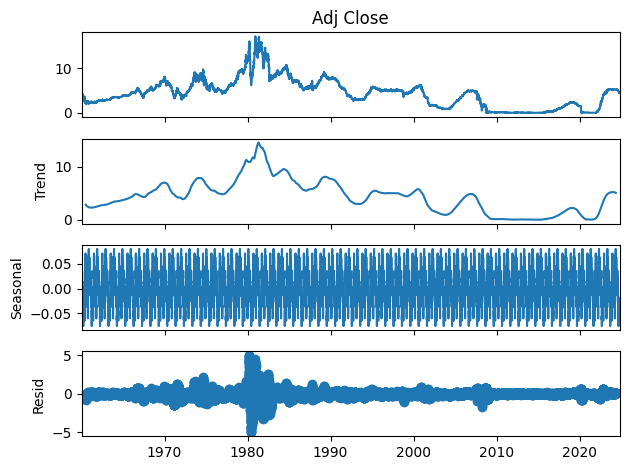

In [ ]:
# Phân tích xu hướng và thành phần
# Sử dụng biểu đồ phân rã (decomposition) để thấy rõ xu hướng (trend), mùa vụ (seasonality), và phần dư (residuals).

from statsmodels.tsa.seasonal import seasonal_decompose

# Phân rã chuỗi thời gian
decomposition = seasonal_decompose(adj_close, model="additive", period=252)  # 252 ngày = 1 năm giao dịch
decomposition.plot()
# plt.title("Decomposition of Time Series (Adj Close)")
plt.show()

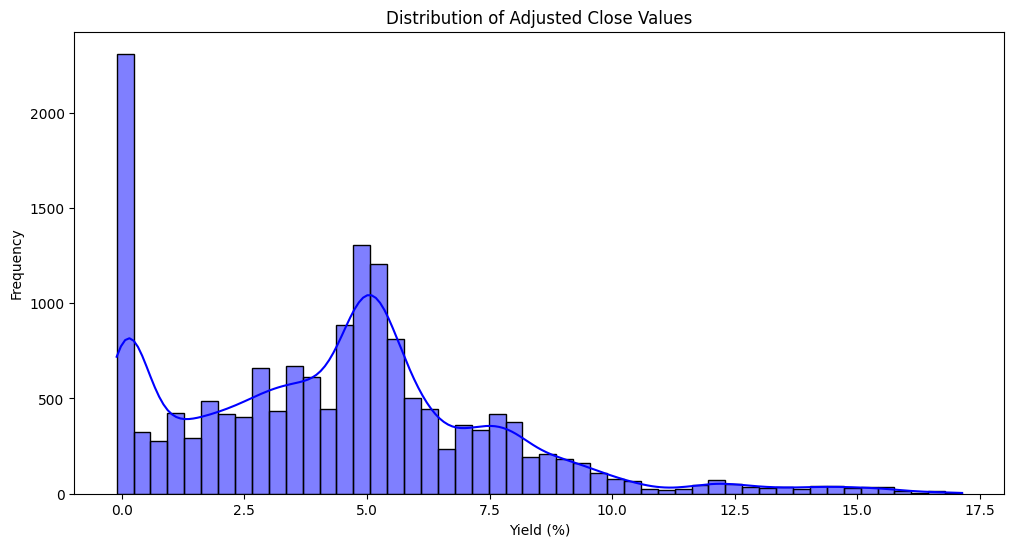

In [ ]:
# Phân phối dữ liệu
# Dùng histogram và đường KDE để kiểm tra phân phối của lợi suất.
# Dễ dàng nhận biết dữ liệu có phân phối chuẩn hay không, cũng như sự tồn tại của các giá trị ngoại lai.

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(adj_close, kde=True, bins=50, color="blue")
plt.title("Distribution of Adjusted Close Values")
plt.xlabel("Yield (%)")
plt.ylabel("Frequency")
plt.show()

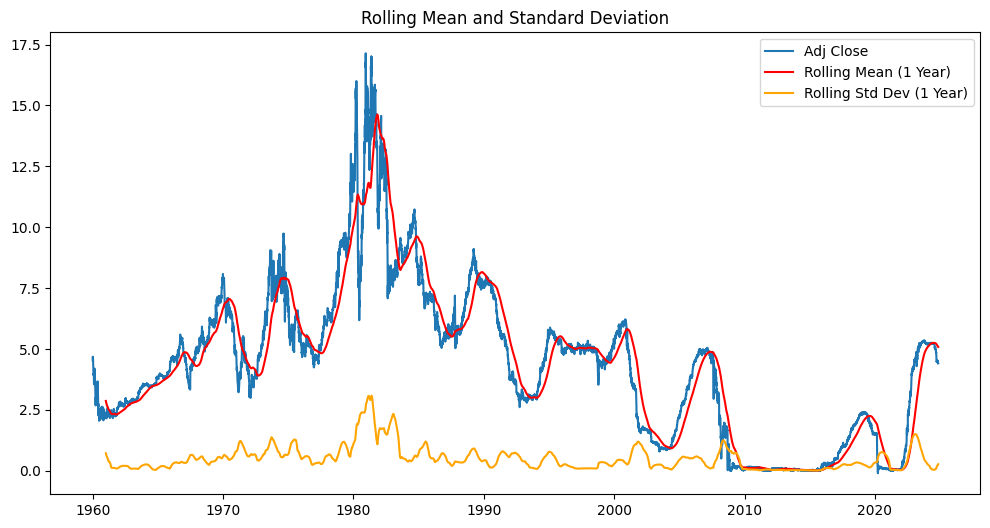

In [6]:
# Tính bất ổn định
# Sử dụng rolling mean và rolling standard deviation để xem xét sự thay đổi biến động.
# Cho thấy liệu chuỗi thời gian có ổn định hay không, giúp đánh giá tính dừng (stationarity).

rolling_mean = adj_close.rolling(window=252).mean()
rolling_std = adj_close.rolling(window=252).std()

plt.figure(figsize=(12, 6))
plt.plot(adj_close, label="Adj Close")
plt.plot(rolling_mean, label="Rolling Mean (1 Year)", color="red")
plt.plot(rolling_std, label="Rolling Std Dev (1 Year)", color="orange")
plt.title("Rolling Mean and Standard Deviation")
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

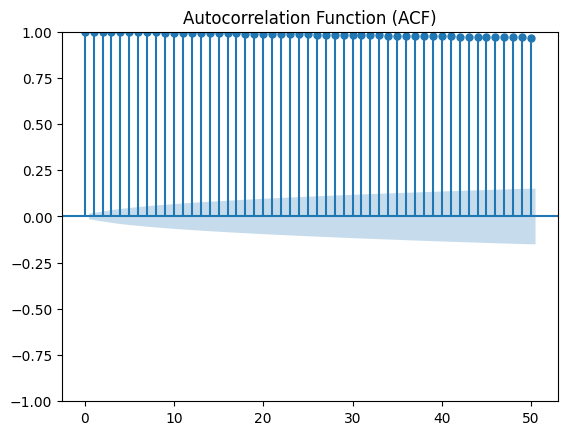

<Figure size 1200x600 with 0 Axes>

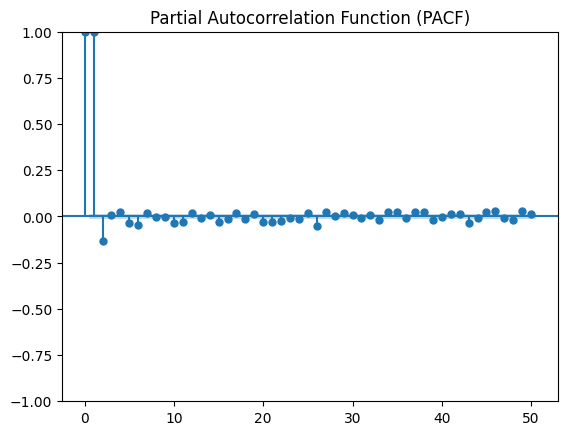

In [ ]:
# Hàm tự tương quan và tự tương quan riêng phần (ACF & PACF)
# Phân tích ACF và PACF để xem xét mối quan hệ giữa các giá trị lag.
# Biểu đồ ACF và PACF giúp xác định độ trễ nào ảnh hưởng nhiều nhất, hữu ích trong việc chọn mô hình ARIMA hoặc AR.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(adj_close.dropna(), lags=50)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(adj_close.dropna(), lags=50)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()


<Figure size 1200x600 with 0 Axes>

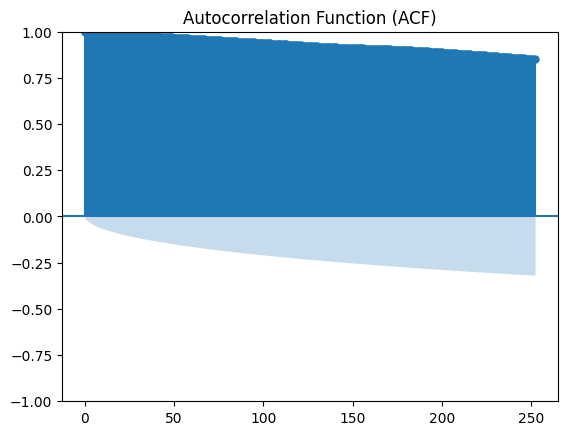

<Figure size 1200x600 with 0 Axes>

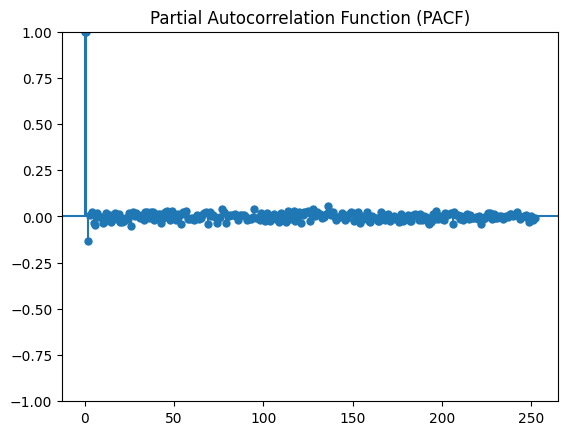

In [9]:
# Hàm tự tương quan và tự tương quan riêng phần (ACF & PACF)
# Phân tích ACF và PACF để xem xét mối quan hệ giữa các giá trị lag.
# Biểu đồ ACF và PACF giúp xác định độ trễ nào ảnh hưởng nhiều nhất, hữu ích trong việc chọn mô hình ARIMA hoặc AR.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(adj_close.dropna(), lags=252)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(adj_close.dropna(), lags=252)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()


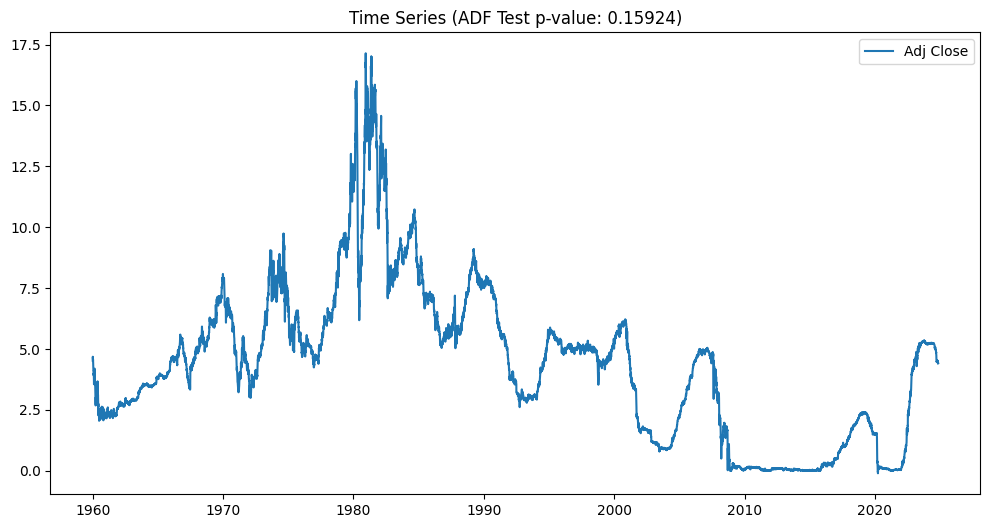

In [ ]:
# Kiểm tra tính dừng
# Sử dụng biểu đồ xu hướng để trực quan hóa và kiểm tra tính dừng.
# Nếu chuỗi có xu hướng rõ ràng, cần thực hiện phép sai phân để làm dừng chuỗi.

from statsmodels.tsa.stattools import adfuller

result = adfuller(adj_close.dropna())
plt.figure(figsize=(12, 6))
plt.plot(adj_close, label="Adj Close")
plt.title(f"Time Series (ADF Test p-value: {result[1]:.5f})")
plt.legend()
plt.show()

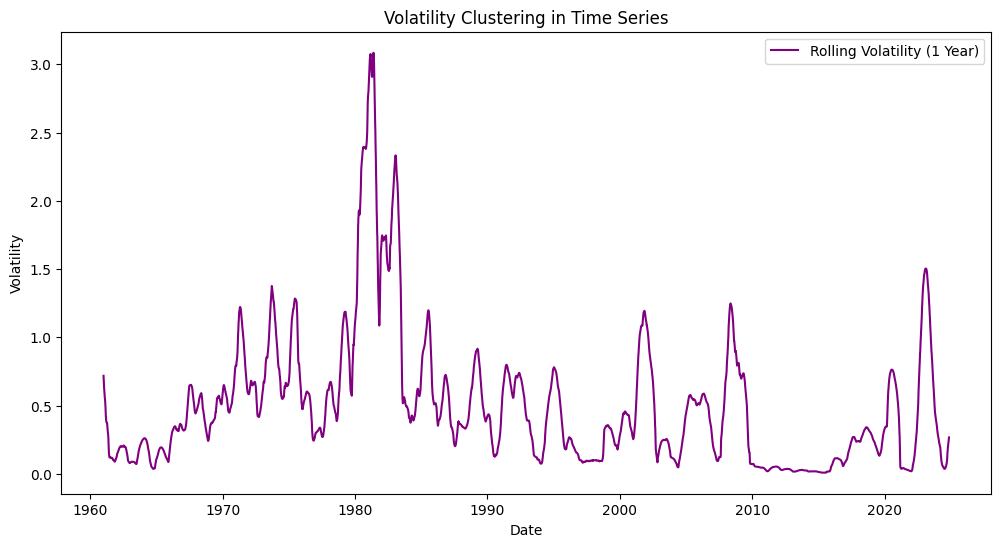

In [11]:
# Kiểm tra volatility clustering
# Sử dụng rolling standard deviation để nhận diện cụm biến động.
# Dữ liệu tài chính thường có cụm biến động, điều này gợi ý mô hình ARCH/GARCH.
rolling_volatility = adj_close.rolling(window=252).std()

plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility, label="Rolling Volatility (1 Year)", color="purple")
plt.title("Volatility Clustering in Time Series")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


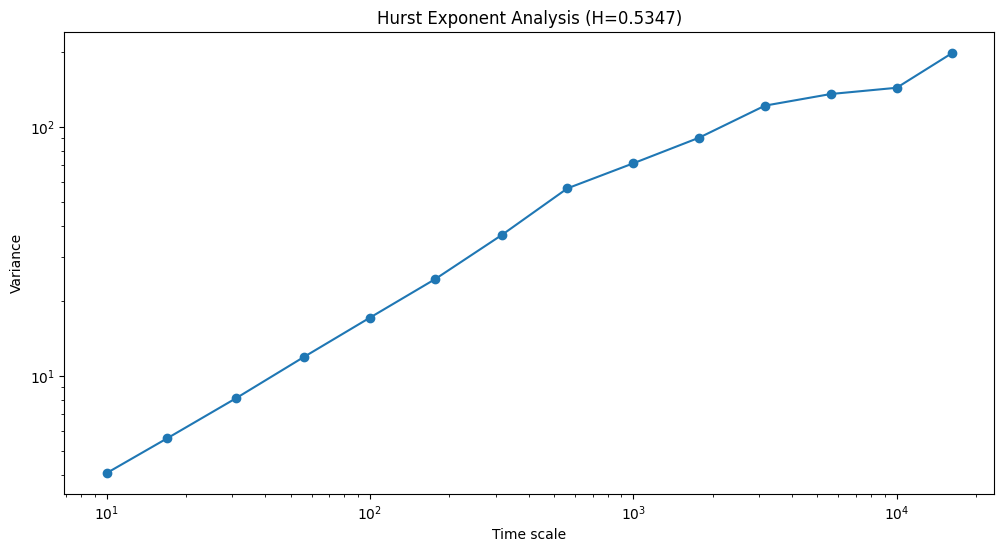

In [12]:
# Phân tích Hurst Exponent
# Hurst Exponent giúp đánh giá chuỗi thời gian có xu hướng (trend-following) hay mean-reverting.
# Biểu đồ log-log cho thấy cách phương sai thay đổi theo thời gian, hỗ trợ đánh giá tính ngẫu nhiên của chuỗi.

from hurst import compute_Hc

H, c, data = compute_Hc(adj_close.dropna())
plt.figure(figsize=(12, 6))
plt.loglog(data[0], data[1], marker="o")
plt.title(f"Hurst Exponent Analysis (H={H:.4f})")
plt.xlabel("Time scale")
plt.ylabel("Variance")
plt.show()


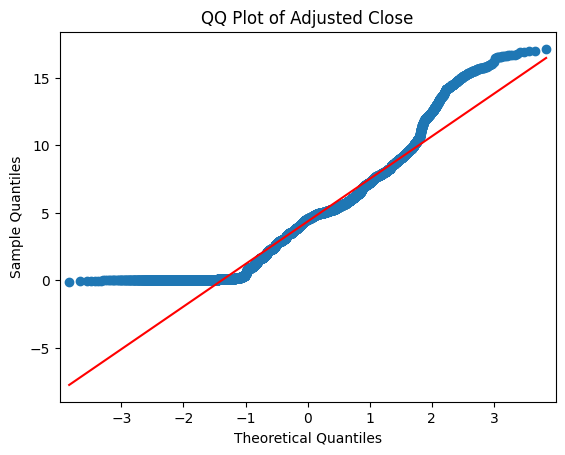

In [13]:
# Biểu đồ QQ-Plot
# Kiểm tra tính chuẩn của chuỗi thời gian.
# Dữ liệu lệch khỏi đường chuẩn gợi ý phân phối không chuẩn, cần xử lý trước khi áp dụng mô hình.

import statsmodels.api as sm

sm.qqplot(adj_close.dropna(), line="s")
plt.title("QQ Plot of Adjusted Close")
plt.show()


In [ ]:
# Xác định tính dừng hoặc thực hiện phép sai phân nếu cần.
# Sử dụng ACF và PACF để chọn mô hình ARIMA hoặc AR phù hợp.
# Nếu có volatility clustering, xem xét ARCH/GARCH.
# Nếu Hurst Exponent > 0.5, mô hình LSTM có thể là lựa chọn tốt.

### **1. Đặc điểm dữ liệu: Tóm tắt**
Từ các phân tích:
1. **Không dừng**: Kết quả kiểm định ADF (p-value = 0.15924) không bác bỏ giả thuyết gốc, chuỗi có thể không dừng.
2. **Tính tự tương quan mạnh**: ACF kéo dài rất lâu, cho thấy dấu hiệu chuỗi có xu hướng mạnh hoặc hiệu ứng bộ nhớ dài.
3. **PACF**: Chỉ rõ các giá trị lag đầu (0, 1, và 2) có ý nghĩa, gợi ý cấu trúc tự hồi quy mạnh ở độ trễ thấp.
4. **Phương sai thay đổi**: Rolling std biến động mạnh ở các giai đoạn khủng hoảng, có thể phù hợp với ARCH/GARCH.
5. **Volatility clustering**: Phù hợp với các mô hình mô hình hóa phương sai biến động.
6. **Hurst Exponent (H = 0.5347)**: Gần 0.5, cho thấy chuỗi có thể là chuyển động ngẫu nhiên với dấu hiệu mean-reverting nhẹ.
7. **Mùa vụ**: Xu hướng mùa vụ rõ ràng, cần xem xét thêm các mô hình có thành phần chu kỳ hoặc làm mịn.

---

### **2. Lựa chọn mô hình: Hướng tiếp cận**
Dựa trên các đặc điểm trên, tôi đề xuất thử nghiệm theo từng nhóm mô hình, từ đơn giản đến phức tạp:

#### **Nhóm 1: Mô hình cơ bản**
1. **Naïve Methods (Persistence Models)**: Dự báo giá trị tương lai bằng giá trị gần nhất (naïve) hoặc trung bình di động.
2. **Exponential Smoothing**:
   - Dùng để xử lý xu hướng và mùa vụ.
   - Các mô hình như Holt-Winters (Triple Exponential Smoothing) phù hợp với chuỗi có xu hướng và thành phần mùa vụ.

#### **Nhóm 2: Mô hình tuyến tính**
1. **ARIMA**: Với độ dừng chưa rõ ràng, thử nghiệm ARIMA(p, d, q) bằng cách:
   - Tạo sai phân lần 1 để làm dừng chuỗi.
   - Sử dụng ACF và PACF để ước lượng p, q.
2. **SARIMA**: Bổ sung thành phần mùa vụ.
3. **ARIMAX**: Thêm biến giải thích bên ngoài (nếu có thông tin khác như GDP, CPI).

#### **Nhóm 3: Mô hình phi tuyến**
1. **ARCH/GARCH**:
   - Phù hợp với volatility clustering và phương sai thay đổi.
2. **EGARCH hoặc GJR-GARCH**:
   - Nếu có dấu hiệu bất đối xứng (leverage effect).

#### **Nhóm 4: Mô hình học sâu**
1. **LSTM**:
   - Tối ưu với chuỗi thời gian dài, có hiệu ứng bộ nhớ.
2. **Transformer**:
   - Phù hợp với chuỗi phức tạp và mối liên hệ dài hạn.
3. **Hybrid Models**:
   - Kết hợp LSTM/GRU với ARIMA hoặc các mô hình khác để tận dụng ưu điểm của cả hai.

---

### **3. Quy trình thực nghiệm**
#### **Bước 1: Chuẩn bị dữ liệu**
- Chuyển đổi dữ liệu:
  - Sai phân lần 1 để làm dừng chuỗi.
  - Standardize dữ liệu để xử lý volatility.
- Chia dữ liệu:
  - 70% để huấn luyện, 30% kiểm tra.
  - Thử nghiệm kịch bản rolling window để đánh giá dự báo qua thời gian.

#### **Bước 2: Đánh giá mô hình**
- Sử dụng các chỉ số chính để đánh giá:
  - **RMSE, MAE**: Đánh giá sai số.
  - **MAPE**: Đặc biệt quan trọng trong dữ liệu tài chính.
  - **Diebold-Mariano Test**: So sánh mô hình dự báo.
- Trực quan hóa kết quả dự báo và phần dư.

---

### **4. Trực quan hóa thêm**
Để hỗ trợ đánh giá tốt hơn, bạn có thể:
1. Biểu đồ rolling mean/std từng giai đoạn khủng hoảng.
2. So sánh dự báo với dữ liệu thực tế theo thời gian.
3. Biểu đồ phân phối phần dư của từng mô hình.
😊